In [15]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix, classification_report

Load the Fashion MNIST dataset

In [16]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

Normalize pixel values to be between 0 and 1

In [17]:
x_train, x_test = x_train / 255.0, x_test / 255.0

Flatten the images to 1D vectors of size 784

In [18]:
x_train = x_train.reshape(-1, 784)
x_test = x_test.reshape(-1, 784)

Split training data into training and validation sets

In [19]:
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

Visualize some images and labels

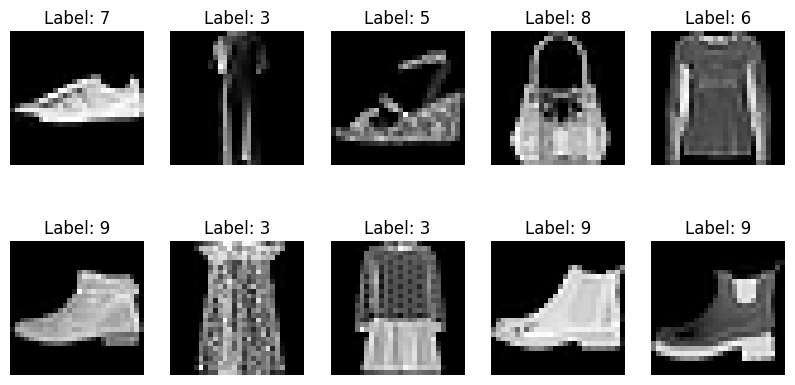

In [20]:
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(x_train[i].reshape(28, 28), cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')
plt.show()

Model creation

In [21]:
model = Sequential([
    Dense(128, activation='relu', input_shape=(784,)),
    BatchNormalization(),
    Dropout(0.2),
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),
    Dense(10, activation='softmax')
])

In [22]:
initial_learning_rate = 0.001
optimizer = Adam(learning_rate=initial_learning_rate)
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [23]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_model.h5', save_best_only=True, monitor='val_loss')

Model Training

In [24]:
history = model.fit(
    x_train, y_train, 
    epochs=50,
    batch_size=64,
    validation_data=(x_val, y_val),
    callbacks=[early_stopping, model_checkpoint]
)

Epoch 1/50
750/750 [==============================] - 3s 3ms/step - loss: 0.6394 - accuracy: 0.7747 - val_loss: 0.4245 - val_accuracy: 0.8458
Epoch 2/50
  1/750 [..............................] - ETA: 2s - loss: 0.5308 - accuracy: 0.8281

c:\Users\Win10\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


750/750 [==============================] - 2s 3ms/step - loss: 0.4471 - accuracy: 0.8384 - val_loss: 0.4051 - val_accuracy: 0.8543
Epoch 3/50
750/750 [==============================] - 2s 3ms/step - loss: 0.4029 - accuracy: 0.8532 - val_loss: 0.3648 - val_accuracy: 0.8646
Epoch 4/50
750/750 [==============================] - 2s 3ms/step - loss: 0.3803 - accuracy: 0.8618 - val_loss: 0.3526 - val_accuracy: 0.8673
Epoch 5/50
750/750 [==============================] - 2s 2ms/step - loss: 0.3623 - accuracy: 0.8677 - val_loss: 0.3588 - val_accuracy: 0.8684
Epoch 6/50
750/750 [==============================] - 2s 3ms/step - loss: 0.3481 - accuracy: 0.8717 - val_loss: 0.3447 - val_accuracy: 0.8739
Epoch 7/50
750/750 [==============================] - 2s 3ms/step - loss: 0.3333 - accuracy: 0.8783 - val_loss: 0.3249 - val_accuracy: 0.8841
Epoch 8/50
750/750 [==============================] - 2s 3ms/step - loss: 0.3257 - accuracy: 0.8794 - val_loss: 0.3253 - val_accuracy: 0.8798
Epoch 9/50
750/75

In [25]:
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6, verbose=1)
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

In [26]:
history1 = model.fit(
    x_train, y_train, 
    epochs=50,
    batch_size=64,
    validation_data=(x_val, y_val),
    callbacks=[early_stopping, model_checkpoint, lr_scheduler]
)

Epoch 1/50
750/750 [==============================] - 2s 3ms/step - loss: 0.2449 - accuracy: 0.9081 - val_loss: 0.3218 - val_accuracy: 0.8909 - lr: 0.0010
Epoch 2/50
750/750 [==============================] - 2s 3ms/step - loss: 0.2425 - accuracy: 0.9075 - val_loss: 0.3104 - val_accuracy: 0.8905 - lr: 0.0010
Epoch 3/50
750/750 [==============================] - 2s 3ms/step - loss: 0.2400 - accuracy: 0.9085 - val_loss: 0.3314 - val_accuracy: 0.8809 - lr: 0.0010
Epoch 4/50
750/750 [==============================] - 2s 3ms/step - loss: 0.2388 - accuracy: 0.9089 - val_loss: 0.3195 - val_accuracy: 0.8866 - lr: 0.0010
Epoch 5/50
729/750 [============================>.] - ETA: 0s - loss: 0.2347 - accuracy: 0.9111
Epoch 5: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
750/750 [==============================] - 2s 3ms/step - loss: 0.2348 - accuracy: 0.9110 - val_loss: 0.3241 - val_accuracy: 0.8882 - lr: 0.0010
Epoch 6/50
750/750 [==============================] - 2s 3ms/ste

In [27]:
history = {
    key: history.history[key] + history1.history[key]
    for key in history.history
}

In [28]:
history2 = model.fit(
    x_train, y_train, 
    epochs=50,
    batch_size=64,
    validation_data=(x_val, y_val),
    callbacks=[model_checkpoint, lr_scheduler]
)

Epoch 1/50
750/750 [==============================] - 2s 2ms/step - loss: 0.1728 - accuracy: 0.9347 - val_loss: 0.3084 - val_accuracy: 0.8986 - lr: 1.5625e-05
Epoch 2/50
750/750 [==============================] - 2s 2ms/step - loss: 0.1692 - accuracy: 0.9357 - val_loss: 0.3105 - val_accuracy: 0.8981 - lr: 1.5625e-05
Epoch 3/50
750/750 [==============================] - 2s 2ms/step - loss: 0.1690 - accuracy: 0.9358 - val_loss: 0.3112 - val_accuracy: 0.8988 - lr: 1.5625e-05
Epoch 4/50
740/750 [============================>.] - ETA: 0s - loss: 0.1698 - accuracy: 0.9352
Epoch 4: ReduceLROnPlateau reducing learning rate to 7.812500371073838e-06.
750/750 [==============================] - 2s 2ms/step - loss: 0.1695 - accuracy: 0.9353 - val_loss: 0.3114 - val_accuracy: 0.8980 - lr: 1.5625e-05
Epoch 5/50
750/750 [==============================] - 2s 2ms/step - loss: 0.1683 - accuracy: 0.9367 - val_loss: 0.3117 - val_accuracy: 0.8981 - lr: 7.8125e-06
Epoch 6/50
750/750 [========================

In [31]:
history = {
    key: history[key] + history2.history[key]
    for key in history
}

Evaluate the model on the test set

In [37]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_accuracy * 100:.2f}")

313/313 [==============================] - 0s 882us/step - loss: 0.3337 - accuracy: 0.8951
Test accuracy: 89.51


Classification Report

In [38]:
y_pred = np.argmax(model.predict(x_test), axis=-1)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred, target_names=[
    "T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"
])

print("Classification Report:\n", class_report)

313/313 [==============================] - 0s 826us/step
Classification Report:
               precision    recall  f1-score   support

 T-shirt/top       0.83      0.86      0.85      1000
     Trouser       0.99      0.97      0.98      1000
    Pullover       0.80      0.82      0.81      1000
       Dress       0.89      0.90      0.90      1000
        Coat       0.82      0.83      0.82      1000
      Sandal       0.98      0.97      0.97      1000
       Shirt       0.73      0.69      0.71      1000
     Sneaker       0.95      0.97      0.96      1000
         Bag       0.98      0.97      0.98      1000
  Ankle boot       0.97      0.96      0.97      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.89     10000
weighted avg       0.90      0.90      0.89     10000



Confusion Matrix

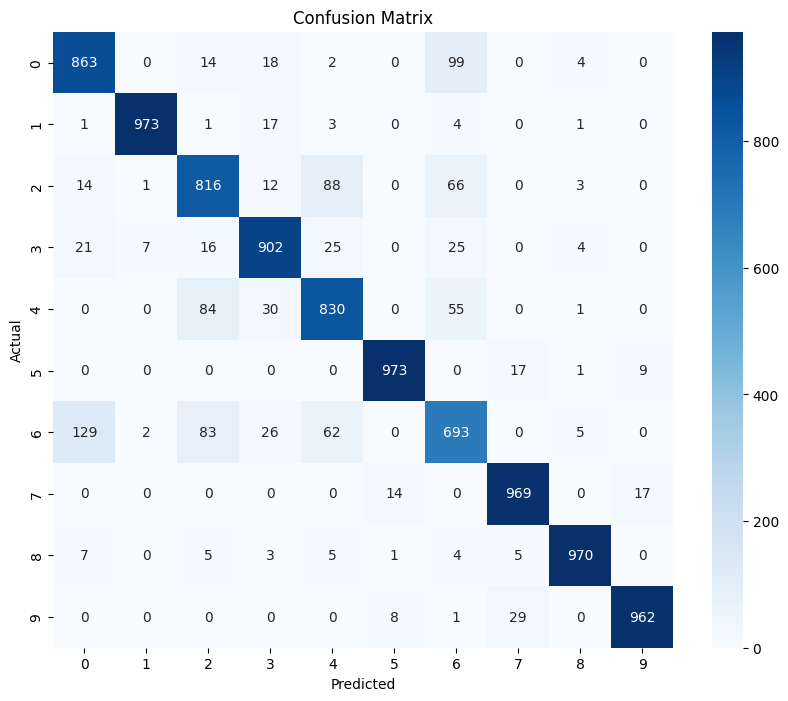

In [39]:
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=range(10), yticklabels=range(10))
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

Training Vs Validation Accuracy and Loss Curves

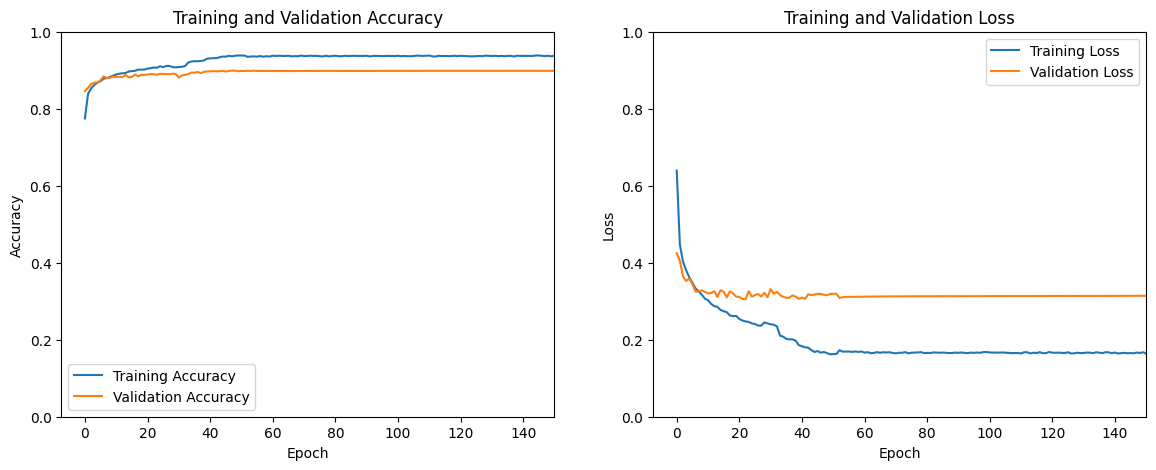

In [42]:
plt.figure(figsize=(14, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history['accuracy'], label='Training Accuracy')
plt.plot(history['val_accuracy'], label='Validation Accuracy')
plt.xlim(right=100)
plt.ylim(0,1)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history['loss'], label='Training Loss')
plt.plot(history['val_loss'], label='Validation Loss')
plt.xlim(right=100)
plt.ylim(0,1)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.show()
